# Exploratory Data Analysis - Lab

## 🔍 Overview
The lab is designed to be self-guided, providing solutions for each exercise to check your work and assist if you get stuck. However, it is important to first attempt to solve the problem on your own as this is the best way to learn. If you become stuck, don't give up and seek help from the instructor, peers, or even a search engine like Google. Be mindful that not all answers from a search engine may be correct, so use your judgement to determine the validity of the information. Remember, the best way to learn is to try solving the problem yourself first.

This lab is designed to help you practice exploratory data analysis using Python. You will work with one dataset: auto-mpg. You will use various data visualization and analysis techniques to gain insights and identify patterns in the data, and clean and preprocess the data to make it more suitable for analysis.

## 🎯 Objectives
By the end of this lab, you should be able to:

- Load and preprocess data using Python libraries such as pandas
- Clean and preprocess the data to make it more suitable for analysis
- Use visualization techniques to explore and understand the distribution of the variables in the data
- Apply basic statistical analysis to derive insights from the data
- Communicate your findings through clear and effective data visualizations and summaries

#### Package Imports
We will keep coming back to this cell to add "import" statements, and configure libraries as we need

In [2]:
import pandas as pd
from scipy.stats import trim_mean

# Configure pandas to display 500 rows; otherwise it will truncate the output
pd.set_option('display.max_rows', 500)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.style.use("bmh")

## Auto-MPG Data
This dataset is licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license.

[Dataset Source](https://archive.ics.uci.edu/ml/datasets/auto+mpg)

### Exercise 1:  Load the dataset
You've had plenty of exercise in doing this. Load the dataset into a pandas dataframe.

The dataset is available in the `data/auto-mpg.data` file. Check the file to determine the delimiter and/or the appropriate pandas method to use to load the data.

Make sure you name the variable `auto_mpg_df` and that you use the appropriate pandas method to load the data.

In [3]:
auto_mpg_df = pd.read_table('./data/auto-mpg/auto-mpg.data', sep="\t")

<details>
  <summary>💡 Solution</summary>

  ```python
    auto_mpg_df = pd.read_table('./data/auto-mpg/auto-mpg.data', sep="\t")
  ```
</details>


### Exercise 2: Confirm the data loaded correctly
Generally, after any data import, we need to make sure we got the data imported correctly. This is especially true when we're working with data that we didn't create ourselves.

One way this can be achieved is to print/display the dataframe. but this can be problematic if the dataframe is large.

Let's explore a few different ways.

#### 2.1: Display the <u>first</u> 5 rows of the dataframe


In [4]:
auto_mpg_df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


<details>
  <summary>💡 Solution</summary>

  ```python
  auto_mpg_df.head()
  # or 
  # auto_mpg_df.head(5)
  # or 
  # auto_mpg_df.head(n=5) 
  # or 
  # auto_mpg_df[:5] 
  # or 
  # auto_mpg_df.iloc[:5] 
  # or 
  # auto_mpg_df.iloc[0:5] 
  # or 
  # auto_mpg_df.iloc[[0,1,2,3,4]] 
  ```
</details>

#### 2.2: Display the <u>last</u> 5 rows of the dataframe

In [5]:
auto_mpg_df.tail(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
404,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,ford mustang gl
405,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,vw pickup
406,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,dodge rampage
407,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,ford ranger
408,31.0,4.0,119.0,82.0,2720.0,19.4,82.0,1.0,chevy s-10


<details>
  <summary>💡 Solution</summary>

  ```python
  auto_mpg_df.tail()
```
</details>

#### 2.3: Display <u>random</u> 5 rows of the dataframe
just viewing the first and last records may not be enough. We may want to see some random records to make sure we have the data we expect.

In [6]:
auto_mpg_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
91,28.0,4.0,98.0,80.0,2164.0,15.0,72.0,1.0,dodge colt (sw)
125,29.0,4.0,68.0,49.0,1867.0,19.5,73.0,2.0,fiat 128
153,32.0,4.0,83.0,61.0,2003.0,19.0,74.0,3.0,datsun 710
143,18.0,6.0,225.0,105.0,3613.0,16.5,74.0,1.0,plymouth satellite sebring
230,17.0,8.0,260.0,110.0,4060.0,19.0,77.0,1.0,oldsmobile cutlass supreme


<details>
  <summary>💡 Solution</summary>

  ```python
  auto_mpg_df.sample(5)
```
</details>

> 🚩 This is a good point to commit your code to your repository.

### Exercise 3: Dataset Metadata
Now that we've confirmed the data loaded correctly, let's take a look at the metadata for the dataset.

#### 3.1: Display the number of rows and columns in the dataframe

In [7]:
auto_mpg_df.shape

(409, 9)

<details>
  <summary>💡 Solution</summary>

  ```python
  auto_mpg_df.shape
```
</details>

#### 3.2: Display a summary about the dataframe


In [8]:
auto_mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           400 non-null    float64
 1   cylinders     409 non-null    float64
 2   displacement  409 non-null    float64
 3   horsepower    403 non-null    float64
 4   weight        409 non-null    float64
 5   acceleration  409 non-null    float64
 6   model_year    409 non-null    float64
 7   origin        409 non-null    float64
 8   car_name      409 non-null    object 
dtypes: float64(8), object(1)
memory usage: 28.9+ KB



<details>
  <summary>💡 Solution</summary>

  ```python
  auto_mpg_df.info()
```
</details>

### 3.3: Display the statistics for the dataframe

In [9]:
auto_mpg_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,400.000000,409.000000,409.000000,403.000000,409.000000,409.000000,409.000000,409.000000
mean,23.482000,5.488998,195.881418,105.429280,2986.088020,15.496577,75.897311,1.564792
std,7.810255,1.715129,107.188359,38.959819,848.259456,2.812496,3.754633,0.796027
min,9.000000,3.000000,4.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.375000,4.000000,105.000000,76.000000,2228.000000,13.600000,73.000000,1.000000
50%,23.000000,4.000000,151.000000,95.000000,2833.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,302.000000,130.000000,3630.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,552.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


<details>
  <summary>💡 Solution </summary>
  
  ```python
  auto_mpg_df.describe()
  ```
</details>

> 🚩 This is a good point to commit your code to your repository.

### Exercise 4: Data Cleaning: Checking for Duplicate Records

#### 4.1: Count the number of exact duplicate records in the dataset

<details>
  <summary>🦉 Hints</summary>

  - The `duplicated()` method can be used to check for duplicate records.
  - This method returns a boolean series indicating whether a record is a duplicate or not.
  - You'll need to chain some other method to provide a count of the duplicate records.

</details>

In [10]:
duplicates_count = auto_mpg_df.duplicated().sum()
print(duplicates_count)

2



<details>
  <summary>💡 Solution</summary>

  ```python
  auto_mpg_df.duplicated().sum()
```
</details>

#### 4.2: Show the duplicate records
using the results of the duplicated() method as a predicate to filter the dataframe, displaying the duplicate records. 

In [11]:
auto_mpg_df[auto_mpg_df.duplicated()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
255,NaN,8.0,383.0,175.0,4166.0,10.5,70.0,1.0,plymouth satellite (sw)
393,16.0,8.0,400.0,180.0,4220.0,11.1,77.0,1.0,pontiac grand prix lj



<details>
  <summary>💡 Solution</summary>

  ```python
  auto_mpg_df[
    auto_mpg_df.duplicated()
]
```
</details>

#### 4.3: Count the number of duplicate records in the dataset, based on a subset of columns
To be fair, in this exact context, it doesn't really make sense to check for duplicate records based on a subset of columns (or maybe it does). However, we'll do that for the sake of practice.

Let's check for duplicate records based on the `mpg`, `cylinders`, `acceleration`, and `origin` columns.

<details>
  <summary>🦉 Hints</summary>
  
  - You can specify a subset of columns to check for duplicates by passing a list of column names to the `subset` parameter.
</details>

In [12]:
dup_count = auto_mpg_df.duplicated(subset = ['mpg', 'cylinders', 'acceleration', 'origin']).sum()
print(dup_count)

43



<details>
  <summary>💡 Solution</summary>

  ```python
  auto_mpg_df.duplicated(
    subset=['mpg', 'cylinders', 'acceleration', 'origin']
).sum()
```
</details>

### Exercise 5: Data Cleaning: Dropping Duplicate Records
#### 5.1: Drop the duplicate records
Now that we've confirmed that there are duplicate records in the dataset, let's remove them. using the `drop_duplicates()` method.


<details>
  <summary>🦉 Hints</summary>

  - The `drop_duplicates()` method can be used to remove duplicate records.
  - Make sure you either save the results of the method to a new variable, or use the `inplace` parameter to update the dataframe in place.
</details>

In [13]:
auto_mpg_df.drop_duplicates(inplace=True)


<details>
  <summary>💡 Solution</summary>

  ```python
  auto_mpg_df.drop_duplicates(inplace=True)
```
</details>

#### 5.2: Confirm that the duplicate records were removed
Check the number of records in the dataframe to confirm that the duplicates were removed.

In [14]:
auto_mpg_df.shape # the row number changed from 409 to 407 after removing 2 duplicate records

(407, 9)

<details>
  <summary>💡 Solution</summary>

  ```python
    auto_mpg_df.shape
  ```
</details>

### Exercise 6: Data Cleaning: Checking for Missing Values
#### 6.1: Use `info()` to check for missing values

In [15]:
auto_mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 407 entries, 0 to 408
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           399 non-null    float64
 1   cylinders     407 non-null    float64
 2   displacement  407 non-null    float64
 3   horsepower    401 non-null    float64
 4   weight        407 non-null    float64
 5   acceleration  407 non-null    float64
 6   model_year    407 non-null    float64
 7   origin        407 non-null    float64
 8   car_name      407 non-null    object 
dtypes: float64(8), object(1)
memory usage: 31.8+ KB


#### 6.2: Use `isna()` to check for missing values

<details>
  <summary>🦉 Hints</summary>

  - The `isna()` method can be used to check for missing values.
  - This method returns a boolean dataframe indicating whether a cell in the dataframe is missing or not.
  - You'll need to chain some other method to provide a count of the missing records.

</details>

In [16]:
auto_mpg_df.isna().sum()

mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

<details>
  <summary>💡 Solution</summary>

  ```python
    auto_mpg_df.isna().sum()
  ```
</details>

#### 6.3: Use `isnull()` to check for missing values
<details>
  <summary>🦉 Hints</summary>

  - The `isnull()` method can be used to check for missing values.
  - This method returns a boolean dataframe indicating whether a cell in the dataframe is missing or not.
  - You'll need to chain some other method to provide a count of the missing records.

</details>

In [17]:
auto_mpg_df.isnull().sum()

mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

<details>
  <summary>💡 Solution</summary>

  ```python
    auto_mpg_df.isnull().sum()
  ```
</details>

#### What's the difference between `isna()` and `isnull()`? what's your source?

### Exercise 7: Data Cleaning: Dropping Missing Values

#### 7.1: Drop the missing values of the `mpg` column
Now that we've confirmed that there are missing values in the dataset, let's remove them. using the `dropna()` method.

Depending on the context, and on the project you're working on, you may want to drop the missing values, or you may want to replace them with a some value. 

In working with the `auto_mpg` dataset, we'll develop a model to predict the `mpg` of a car based on the other features. So, we'll drop the missing values from the `mpg` column.

<details>
  <summary>🦉 Hints</summary>

  - Use the subset parameter to specify the column(s) to check for missing values.
  - Either save the results of the method to a new variable, or use the `inplace` parameter to update the dataframe in place.

</details>

In [18]:
auto_mpg_df.dropna(subset = ['mpg'],inplace=True)

<details>
  <summary>💡 Solution</summary>

  ```python
    auto_mpg_df.dropna(
      subset=['mpg'],
      inplace=True
    )
  ```
</details>

#### 7.2: Confirm that the missing values in `mpg` were removed

In [22]:
auto_mpg_df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

<details>
  <summary>💡 Solution</summary>

  ```python
    auto_mpg_df.isna().sum()
  ```
</details>

### Exercise 8: Data Cleaning: Replacing Missing Values
Before we can determine what's the best value to replace the missing values with for the `horsepower` column, we need to understand the distribution of the values in that column.

#### 8.1: Display the distribution of the values in the `horsepower` column
Plot a 40-bins histogram of the values in the `horsepower` column.


<details>
  <summary>🦉 Hints</summary>

  - The `plot.hist()` method can be used to plot a histogram.
  - You can also use the `plot()` method with the `kind` parameter set to `hist` directly on the dataframe.
  - The `%matplotlib inline` magic command is required to display the plot in the notebook. (Already done for you on the top cell of the notebook)

</details>


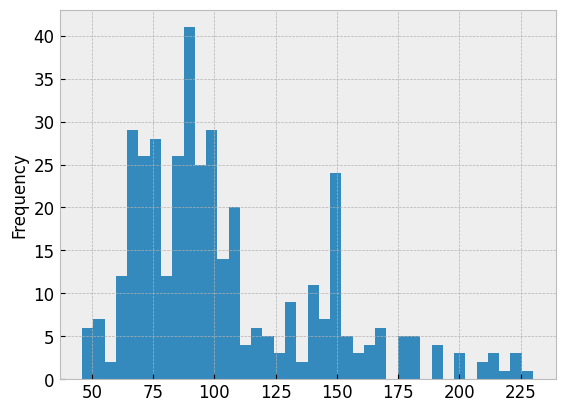

In [25]:
auto_mpg_df['horsepower'].plot.hist(bins=40)
plt.show()

<details>
  <summary>💡 Solution</summary>

  ```python
    auto_mpg_df['horsepower'].plot.hist(bins=40)
    plt.show()
  ```
  OR
  ```python
    auto_mpg_df['horsepower'].plot(kind="hist", bins= 40)
    plt.show()
  ```
  OR
  ```python
    auto_mpg_df.plot(y='horsepower', kind="hist", bins= 40)
    plt.show()
  ```
  OR
  ```python
    auto_mpg_df.plot.hist(y='horsepower', bins= 40)
    plt.show()
  ```
  OR 
  ```python
    plt.hist(auto_mpg_df['horsepower'], bins=40)
    plt.show()
  ```
</details>

#### 8.2: Calculate the mean, median, and trimmed mean for the `horsepower` column

<details>
  <summary>🦉 Hints</summary>

  - The `mean()` method can be used to calculate the mean of a column.
  - The `median()` method can be used to calculate the median of a column.
  - You'll need to use the scipy library to calculate the trimmed mean.
</details>

In [35]:
horsepower_mean = auto_mpg_df['horsepower'].mean()
horsepower_median = auto_mpg_df['horsepower'].median()
horsepower_trimmed_mean = trim_mean(auto_mpg_df['horsepower'], 0.1)

<details>
  <summary>💡 Solution</summary>

  ```python
    from scipy.stats import trim_mean
    ...
    horsepower_mean = auto_mpg_df['horsepower'].mean()
    horsepower_median = auto_mpg_df['horsepower'].median()
    horsepower_trimmed_mean = trim_mean(auto_mpg_df['horsepower'], 0.1)
  ```
</details>

#### 8.3: Display the central tendency measures on the distribution plot

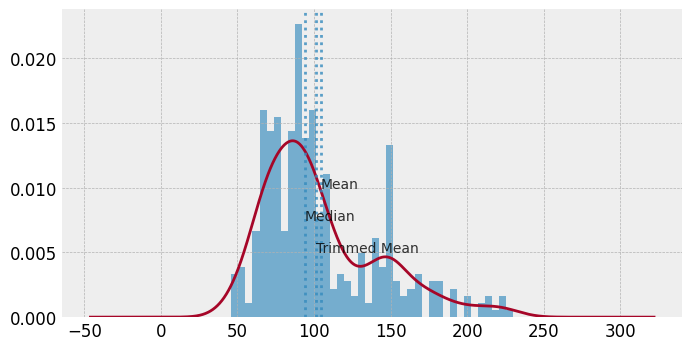

In [31]:
fig, ax = plt.subplots(figsize = (8,4))

auto_mpg_df['horsepower'].plot(kind="hist", density= True, bins=40, alpha = 0.65)
auto_mpg_df['horsepower'].plot(kind="kde")

ax.axvline(horsepower_mean, alpha = 0.8, linestyle = ":")
ax.axvline(horsepower_median, alpha = 0.8, linestyle = ":")
ax.axvline(horsepower_trimmed_mean, alpha = 0.8, linestyle = ":")

# ax.set_yticklabels([])
ax.set_ylabel("")

ax.text(horsepower_mean-.1, .01, "Mean", size = 10, alpha = 0.8)
ax.text(horsepower_median-.4, .0075, "Median", size = 10, alpha = 0.8)
ax.text(horsepower_trimmed_mean+.4, .0050, "Trimmed Mean", size = 10, alpha = 0.8)

ax.tick_params(left = False, bottom = False)
for ax, spine in ax.spines.items():
    spine.set_visible(False)

plt.show()

#### 8.4: Replace the missing values in the `horsepower` column with the median value

In [38]:
auto_mpg_df['horsepower'].fillna(horsepower_median, inplace = True)

<details>
  <summary>💡 Solution</summary>

  ```python
    auto_mpg_df['horsepower'].fillna(horsepower_median, inplace=True)
  ```
</details>

#### 8.5: Confirm that the missing values in `horsepower` were replaced

In [40]:
auto_mpg_df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

<details>
  <summary>💡 Solution</summary>

  ```python
    auto_mpg_df.isna().sum()
  ```
</details>

### Exercise 9: Data Cleaning: Anomalies and outliers
There are many statistical methods to detect outliers in a dataset.
1. Interquartile range (IQR) method:
  * Covered in the lecture videos
  * This method calculates the IQR of the dataset, which is the range between the 25th and 75th percentiles of the data. Data points that are more than a certain multiple of the IQR (e.g., 1.5) away from the 25th or 75th percentile are considered anomalies.
2. Z-score method: 
  * This method calculates the z-score of each data point, which measures how many standard deviations a data point is away from the mean of the dataset. 
  * Data points that have a z-score greater than a certain threshold (e.g., 3 or 4) are considered anomalies.
3. Percentile method: 
  * This method identifies data points that are in the upper or lower percentiles of the dataset.
    * For example, data points that are in the top or bottom 1% of the dataset may be considered anomalies.

We will be exploring all 3 methods in this exercise.

#### 9.1: Display the distribution of the values in the `displacement` column using a box plot

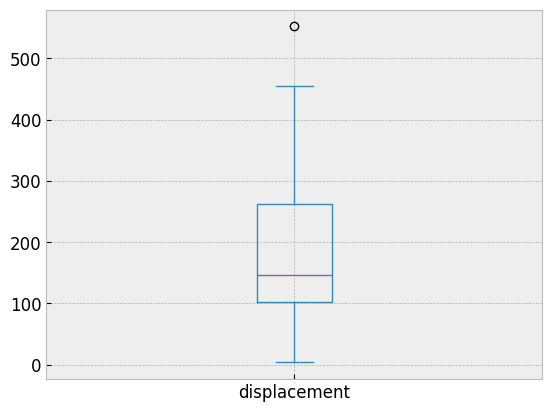

In [41]:
auto_mpg_df['displacement'].plot(kind='box')
plt.show()

<details>
  <summary>💡 Solution</summary>

  ```python
    auto_mpg_df['displacement'].plot(kind="box")
    plt.show()
  ```
</details>

#### 9.2: Calculate the IQR for the `displacement` column
* Calculate the range between the 25th and 75th percentiles of the data. (IQR)
* Calculate the lower and upper bound of the data. using a 1.5 multiple or the IQR. 
  * Lower bound = 25th percentile - 1.5 * IQR
  * Upper bound = 75th percentile + 1.5 * IQR

In [45]:
q1 = auto_mpg_df['displacement'].quantile(0.25)
q3 = auto_mpg_df['displacement'].quantile(0.75)
iqr = q3 - q1

lower_limit = q1 = 1.5*iqr
upper_limit = q3 + 1.5*iqr

print(f'Q1: {q1}, Q3: {q3}, IQR: {iqr}')
print(f'Lower Limit: {lower_limit}, Upper Limit: {upper_limit}')



Q1: 239.25, Q3: 262.0, IQR: 159.5
Lower Limit: 239.25, Upper Limit: 501.25


<details>
  <summary>💡 Solution</summary>

  ```python
    q1 = auto_mpg_df['displacement'].quantile(0.25)
    q3 = auto_mpg_df['displacement'].quantile(0.75)
    iqr = q3 - q1

    print(f"Q1: {q1}, Q3: {q3}, IQR: {iqr}")

    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr

    print(f"Lower Limit: {lower_limit}, Upper Limit: {upper_limit}")
  ```
</details>

#### 9.3: Using Pandas filtering, show records that are outliers in the `displacement` column

<details>
  <summary>🦉 Hints</summary>

  - You'll need to provide a predicate for pandas to filter the dataframe.
  - You can use the `|` operator to combine multiple conditions in a Pandas filter.
</details>

In [46]:
auto_mpg_df[(auto_mpg_df['displacement'] < lower_limit) | (auto_mpg_df['displacement'] > upper_limit)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
20,24.0,4.0,113.0,95.0,2372.0,15.0,70.0,3.0,toyota corona mark ii
21,22.0,6.0,198.0,95.0,2833.0,15.5,70.0,1.0,plymouth duster
22,18.0,6.0,199.0,97.0,2774.0,15.5,70.0,1.0,amc hornet
23,21.0,6.0,200.0,85.0,2587.0,16.0,70.0,1.0,ford maverick
24,27.0,4.0,97.0,88.0,2130.0,14.5,70.0,3.0,datsun pl510
25,26.0,4.0,97.0,46.0,1835.0,20.5,70.0,2.0,volkswagen 1131 deluxe sedan
26,25.0,4.0,110.0,87.0,2672.0,17.5,70.0,2.0,peugeot 504
27,24.0,4.0,107.0,90.0,2430.0,14.5,70.0,2.0,audi 100 ls
28,25.0,4.0,104.0,95.0,2375.0,17.5,70.0,2.0,saab 99e
29,26.0,4.0,121.0,113.0,2234.0,12.5,70.0,2.0,bmw 2002


<details>
  <summary>💡 Solution</summary>

  ```python
    auto_mpg_df[
      (auto_mpg_df['displacement'] < lower_limit) | (auto_mpg_df['displacement'] > upper_limit)
    ]
  ```
</details>

#### 9.4: Calculate the z-score for the `displacement` column
* Calculate the mean and standard deviation of the `displacement` column.
* Calculate the z-score for each data point in the `displacement` column.
  * z-score = (x - mean) / standard deviation

In [47]:
displacement_mean = auto_mpg_df['displacement'].mean()
displacement_std = auto_mpg_df['displacement'].std()

print(f"Mean: {displacement_mean}, Std: {displacement_std}")

Mean: 193.57268170426065, Std: 105.9591913508928


In [50]:
z_scores = (auto_mpg_df['displacement'] - displacement_mean)/displacement_std

<details>
  <summary>💡 Solution</summary>

  ```python
    displacement_mean = auto_mpg_df['displacement'].mean()
    displacement_std = auto_mpg_df['displacement'].std()

    z_scores = (auto_mpg_df['horsepower'] - displacement_mean) / displacement_std
  ```
</details>

#### 9.5: Using Pandas filtering, show records that are outliers in the `displacement` column using the z-score method

In [54]:
auto_mpg_df[(z_scores < -3) | (z_scores > 3)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
43,18.0,6.0,552.0,100.0,3282.0,15.5,71.0,1.0,outlier car


<details>
  <summary>💡 Solution</summary>

  ```python
    auto_mpg_df[
      (z_scores < -3) | (z_scores > 3)
    ]
  ```
</details>

#### 9.6: Using Pandas filtering, show records that are outliers in the `displacement` column using the percentile method
we'll use a 1% threshold for this exercise.

In [55]:
quantile_1 = auto_mpg_df['displacement'].quantile(0.01)
quantile_99 = auto_mpg_df['displacement'].quantile(0.99)
auto_mpg_df[(auto_mpg_df['displacement'] < quantile_1) | (auto_mpg_df['displacement'] > quantile_99)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
8,14.0,8.0,455.0,225.0,4425.0,10.0,70.0,1.0,pontiac catalina
19,14.0,8.0,455.0,225.0,3086.0,10.0,70.0,1.0,buick estate wagon (sw)
34,9.0,8.0,4.0,193.0,4732.0,18.5,70.0,1.0,hi 1200d
43,18.0,6.0,552.0,100.0,3282.0,15.5,71.0,1.0,outlier car
103,12.0,8.0,455.0,225.0,4951.0,11.0,73.0,1.0,buick electra 225 custom
125,29.0,4.0,68.0,49.0,1867.0,19.5,73.0,2.0,fiat 128


<details>
  <summary>💡 Solution</summary>

  ```python
    quantile_1 = auto_mpg_df['displacement'].quantile(0.01)
    quantile_99 = auto_mpg_df['displacement'].quantile(0.99)
    auto_mpg_df[
      (auto_mpg_df['displacement'] < quantile_1) | (auto_mpg_df['displacement'] > quantile_99)
    ]
  ```
</details>

#### 9.7: Display the distribution of the values in the `displacement` column using a histogram

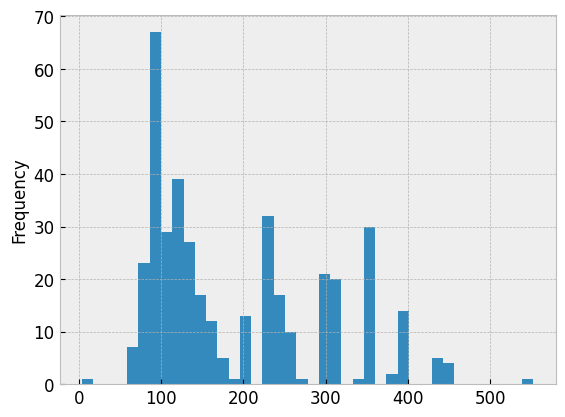

In [60]:
auto_mpg_df['displacement'].plot(kind='hist', bins=40)
plt.show()



<details>
  <summary>💡 Solution</summary>

  ```python
    auto_mpg_df.plot.hist(y='displacement', bins= 40)
    plt.show()
  ```
</details>

#### 9.8: On the historgram, display the upper and lower bounds based on the IQR method

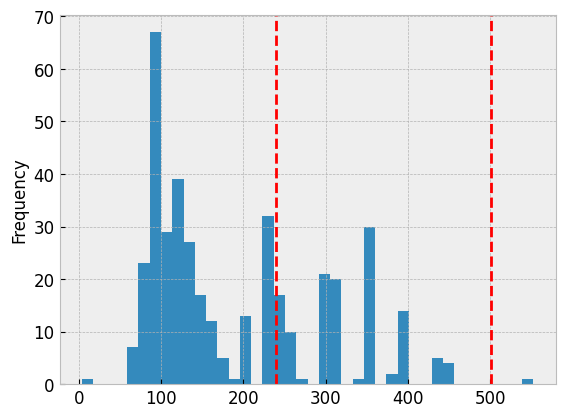

In [63]:
bounds = [upper_limit, lower_limit]

auto_mpg_df['displacement'].plot(kind='hist', bins=40)

for bound in bounds:
    plt.axvline(bound, color='r', linestyle='--')

plt.show()

<details>
  <summary>💡 Solution</summary>

  ```python
    bounds = [upper_limit, lower_limit]

    # Create a histogram of the 'displacement' column
    plt.hist(auto_mpg_df['displacement'], bins=40)

    # Add vertical lines at the percentile values
    for bound in bounds:
        plt.axvline(bound, color='r', linestyle='--')

    plt.show()
  ```
</details>

#### 9.9: Drop the outlier records from the `displacement` column

* Don't do this in place, create a new dataframe.

In [64]:
no_outliers_df = auto_mpg_df.drop(auto_mpg_df[(auto_mpg_df['displacement'] < lower_limit) | (auto_mpg_df['displacement'] > upper_limit)].index)

<details>
  <summary>💡 Solution</summary>

  ```python
    without_outliers = auto_mpg_df[
      (auto_mpg_df['displacement'] > lower_limit) & (auto_mpg_df['displacement'] < upper_limit)
    ]
  ```
  OR
  ```python
    without_outliers = auto_mpg_df.drop(
      auto_mpg_df[
        (auto_mpg_df['displacement'] < lower_limit) | (auto_mpg_df['displacement'] > upper_limit)
      ].index
    )
  ```
</details>

#### 9.10: Show the shape of the original dataframe and the new dataframe to show that the outliers were dropped


In [65]:
display(auto_mpg_df.shape)
display(no_outliers_df.shape)

(399, 9)

(125, 9)

### Exercise 10: Further Exploration

<details>
  <summary>📊 Data Types Diagram</summary>

 ![Data types](https://miro.medium.com/max/1400/1*kySPZcf83qLOuaqB1vJxlg.jpeg)
</details>

#### 10.1: # For each of the 9 columns, Identify the data type: 
* Numerical-Continuous
* Numerical-Discrete
* Categorical-Ordinal
* Categorical-nominal

#### 10.2: Show all the possible values for the `origin` column

<details>
  <summary>🦉 Hints</summary>

  - The `value_counts()` method can be used to show the unique values in a column.
</details>

In [67]:
auto_mpg_df['origin'].value_counts()

origin
1.0    250
3.0     79
2.0     70
Name: count, dtype: int64

<details>
  <summary>💡 Solution</summary>

  ```python
    auto_mpg_df['origin'].value_counts()
  ```
</details>

**What do the values in the `origin` column represent?**

#### **BONUS**: show a scatter plot of the `horsepower` column vs the `weight` column

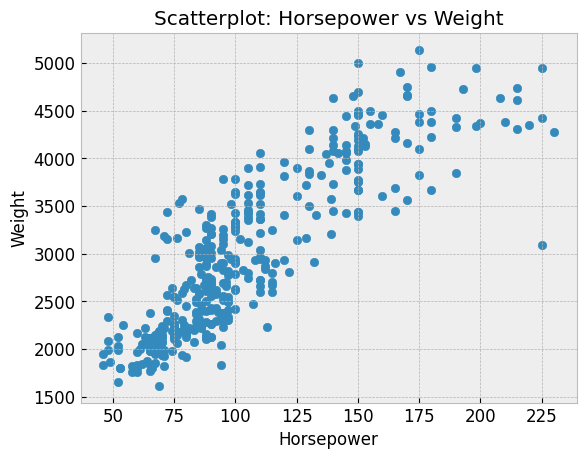

In [69]:
plt.scatter(auto_mpg_df['horsepower'], auto_mpg_df['weight'])

plt.xlabel('Horsepower')
plt.ylabel('Weight')
plt.title('Scatterplot: Horsepower vs Weight')

plt.show()

## Wrap up
Remember to update the self reflection and self evaluations on the `README` file.

Make sure you run the following cell; this converts this Jupyter notebook to a Python script. and will make the process of reviewing your code on GitHub easier

In [70]:
# 🦉: The following command converts this Jupyter notebook to a Python script.
!jupyter nbconvert --to python notebook.ipynb

[NbConvertApp] Converting notebook notebook.ipynb to python
[NbConvertApp] Writing 23620 bytes to notebook.py


> 🚩 **Make sure** you save the notebook and make one final commit here